### Question: What is the safest type of intersection?

Let's see how accidents are splitted based on the place of the event and see where we can feel to be the safest.

First step before any data analysis is to import required libraries and data. Any information required to understand columns is available here: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

caracteristics = pd.read_csv('data/caracteristics.csv', encoding='latin1')

In [6]:
caracteristics.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


Let's change the values in intersection column from numbers to categorical values, below the look-up for development.
* 1 - Out of intersection
* 2 - Intersection in X
* 3 - Intersection in T
* 4 - Intersection in Y
* 5 - Intersection with more than 4 branches
* 6 - Giratory
* 7 - Place
* 8 - Level crossing
* 9 - Other intersection

But first let's check for missing values in 'int' (intersection) column.

In [7]:
caracteristics.columns[caracteristics.isna().sum() != 0]

Index(['atm', 'col', 'com', 'adr', 'gps', 'lat', 'long'], dtype='object')

So it looks like 'int' column is not having missing values, which is super for us in this case. Let's go with renaming values in 'int' column.

In [8]:
int_dict = {
    '1': 'Out of intersection',
    '2': 'X intersection',
    '3': 'T intersection',
    '4': 'Y intersection',
    '5': 'More than 4 branches intersection',
    '6': 'Giratory',
    '7': 'Place',
    '8': 'Level crossing',
    '9': 'Other'

}
caracteristics['int'] = caracteristics['int'].astype(str) 
caracteristics['int'] = caracteristics['int'].replace(int_dict)
caracteristics['int'] = pd.Categorical(caracteristics['int'], list(int_dict.values()))
caracteristics.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,Out of intersection,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,Giratory,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,Out of intersection,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,Out of intersection,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,T intersection,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


<Figure size 432x288 with 0 Axes>

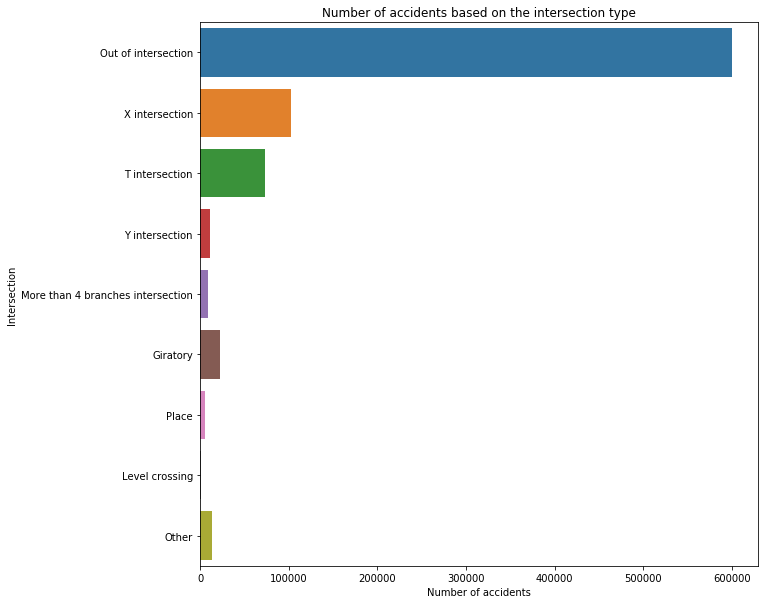

In [19]:
plt.clf()
plt.figure(figsize=(10,10))
ax = sns.countplot(y = 'int', data=caracteristics)
ax.set_title('Number of accidents based on the intersection type')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Intersection')
plt.show()

So it looks like the biggest number of accidents is not on the intersection, but out of it. Looks like out of the intersections we are less carefull and more tempted to make a dangerous maneuvers.

From all of the intersections the 'X' intersection had the highest number of accidents. The 'Y' intersection and intersection with more than 4 branches had the smallest number of accidents. For the second intersection I can tell why - these type of intersection is not so frequent to be seen and based on my own experience people are tempted on such intersection to be super cautious as an example go and see what's behind these coordinates: 51.793863, 19.589690.

The valuable feature in this dataset would be information about exact number of each type of the intersection in France, but it's right now out of scope of this notebook.